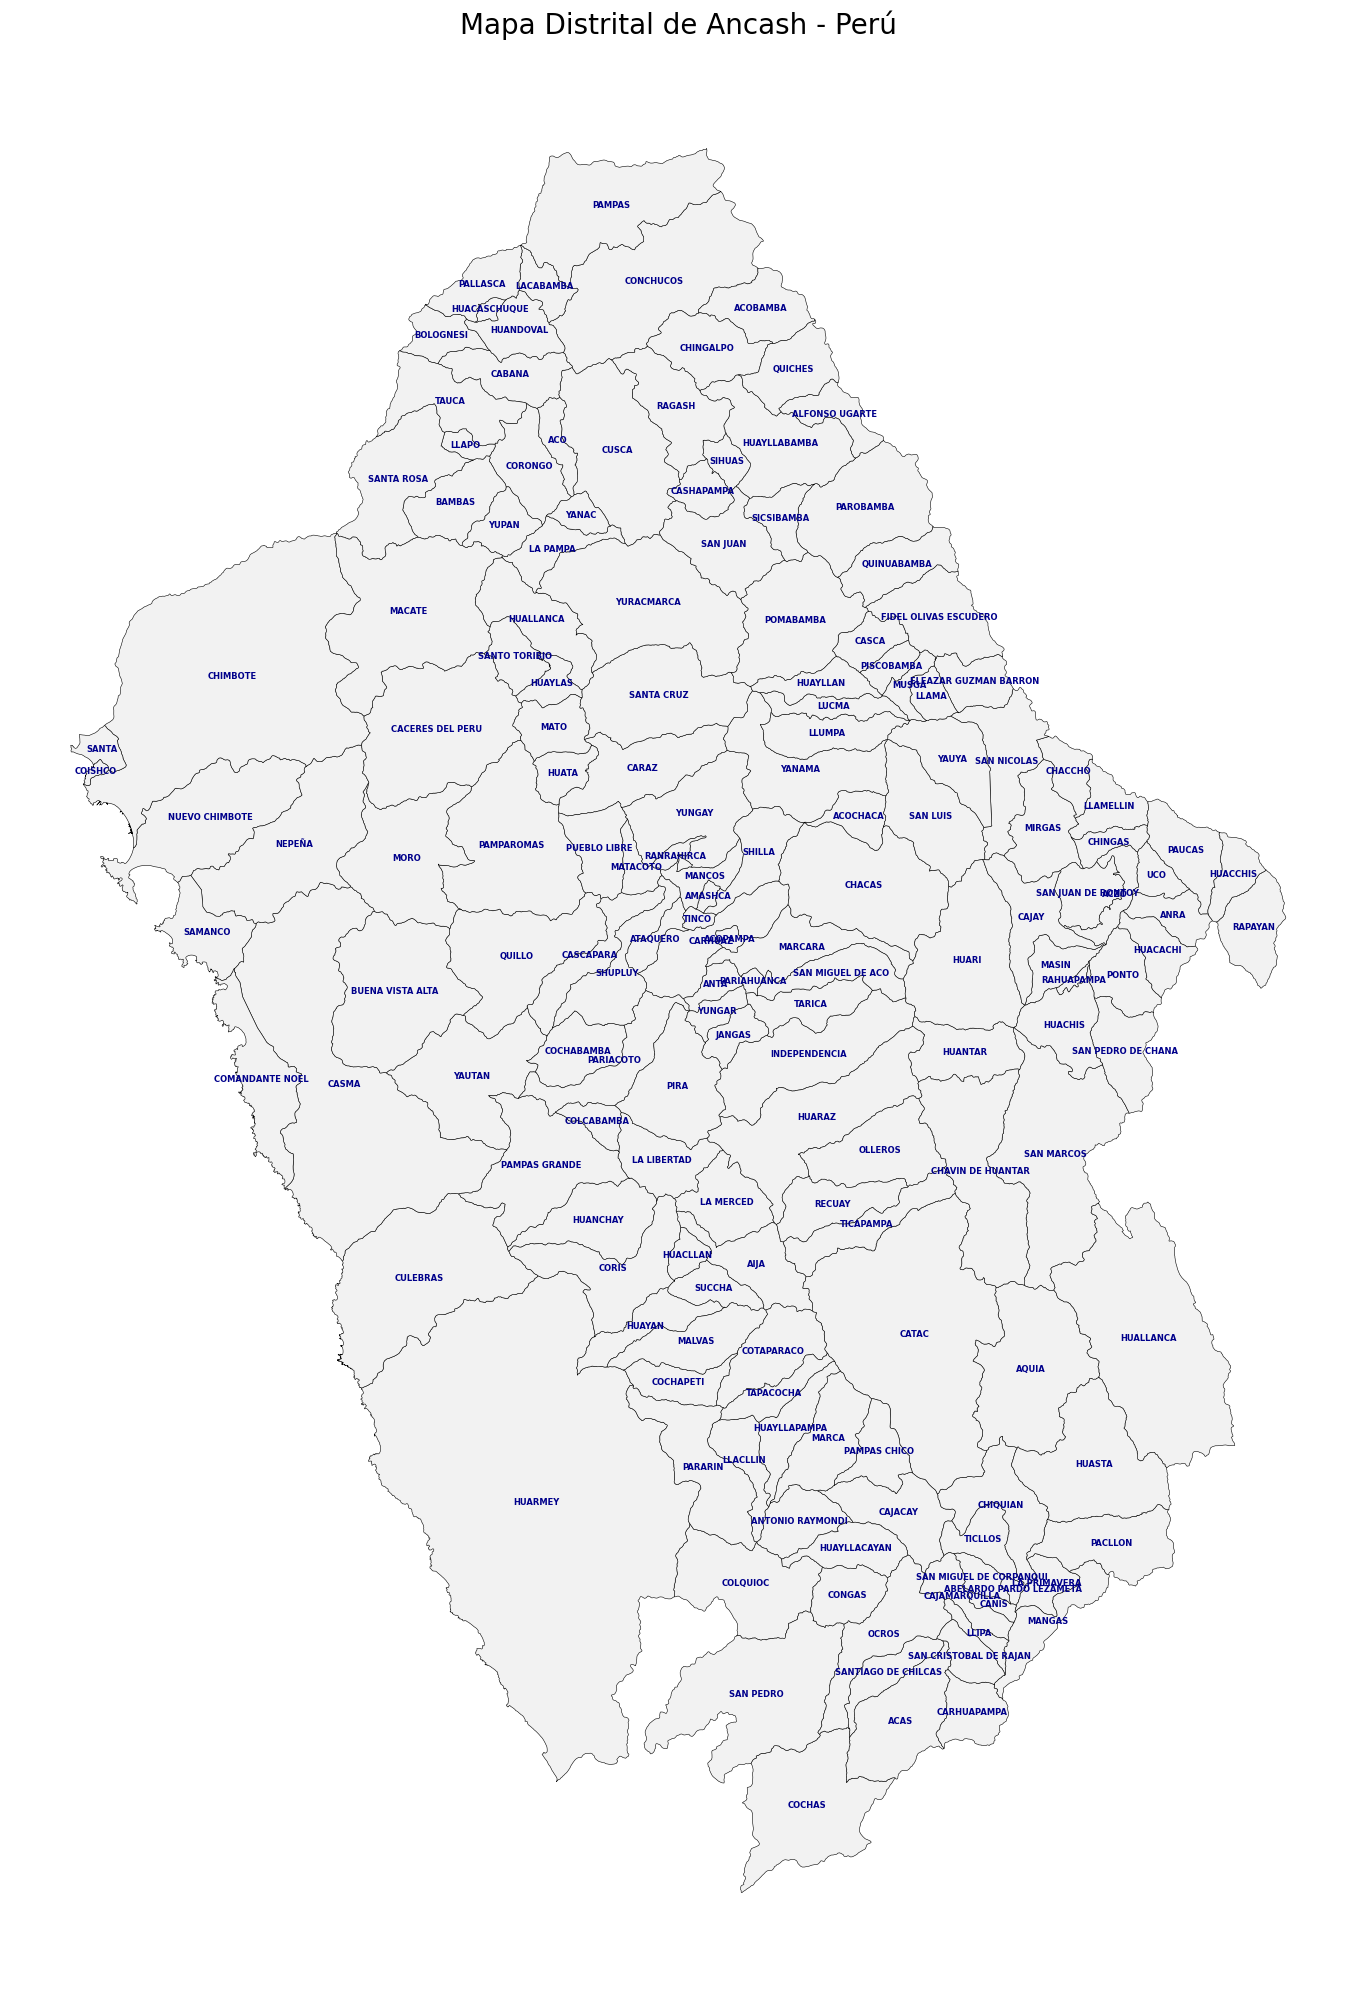

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Cargar el archivo Shapefile
# Asegúrate de que la ruta sea correcta según tu carpeta
path = "DISTRITOS_LIMITES/DISTRITOS.shp"
peru = gpd.read_file(path)

# 2. Filtrar solo el departamento de Ancash
ancash = peru[peru['DEPARTAMEN'] == 'ANCASH'].copy()

# 3. Configurar el tamaño de la figura (Más grande para legibilidad)
fig, ax = plt.subplots(figsize=(20, 20))

# 4. Dibujar el mapa
# Usamos 'PROVINCIA' para darle colores distintos por zona o simplemente un color neutro
ancash.plot(ax=ax, color='#f2f2f2', edgecolor='black', linewidth=0.4)

# 5. Agregar etiquetas de nombres dentro de cada distrito
for idx, row in ancash.iterrows():
    # Calculamos el punto central (centroide) de cada distrito
    centroid = row.geometry.centroid
    
    # Dibujamos el texto del nombre del distrito
    ax.annotate(
        text=row['DISTRITO'], 
        xy=(centroid.x, centroid.y),
        horizontalalignment='center', 
        verticalalignment='center',
        fontsize=6,          # Tamaño de letra pequeño para evitar que se amontonen
        color='darkblue',
        fontweight='bold',
        clip_on=True         # Asegura que el texto se mantenga dentro de los límites
    )

# 6. Toques finales estéticos
plt.title("Mapa Distrital de Ancash - Perú", fontsize=20, pad=20)
plt.axis('off')  # Ocultamos las coordenadas de latitud/longitud para que se vea más limpio
plt.tight_layout()

# Mostrar el resultado
plt.show()

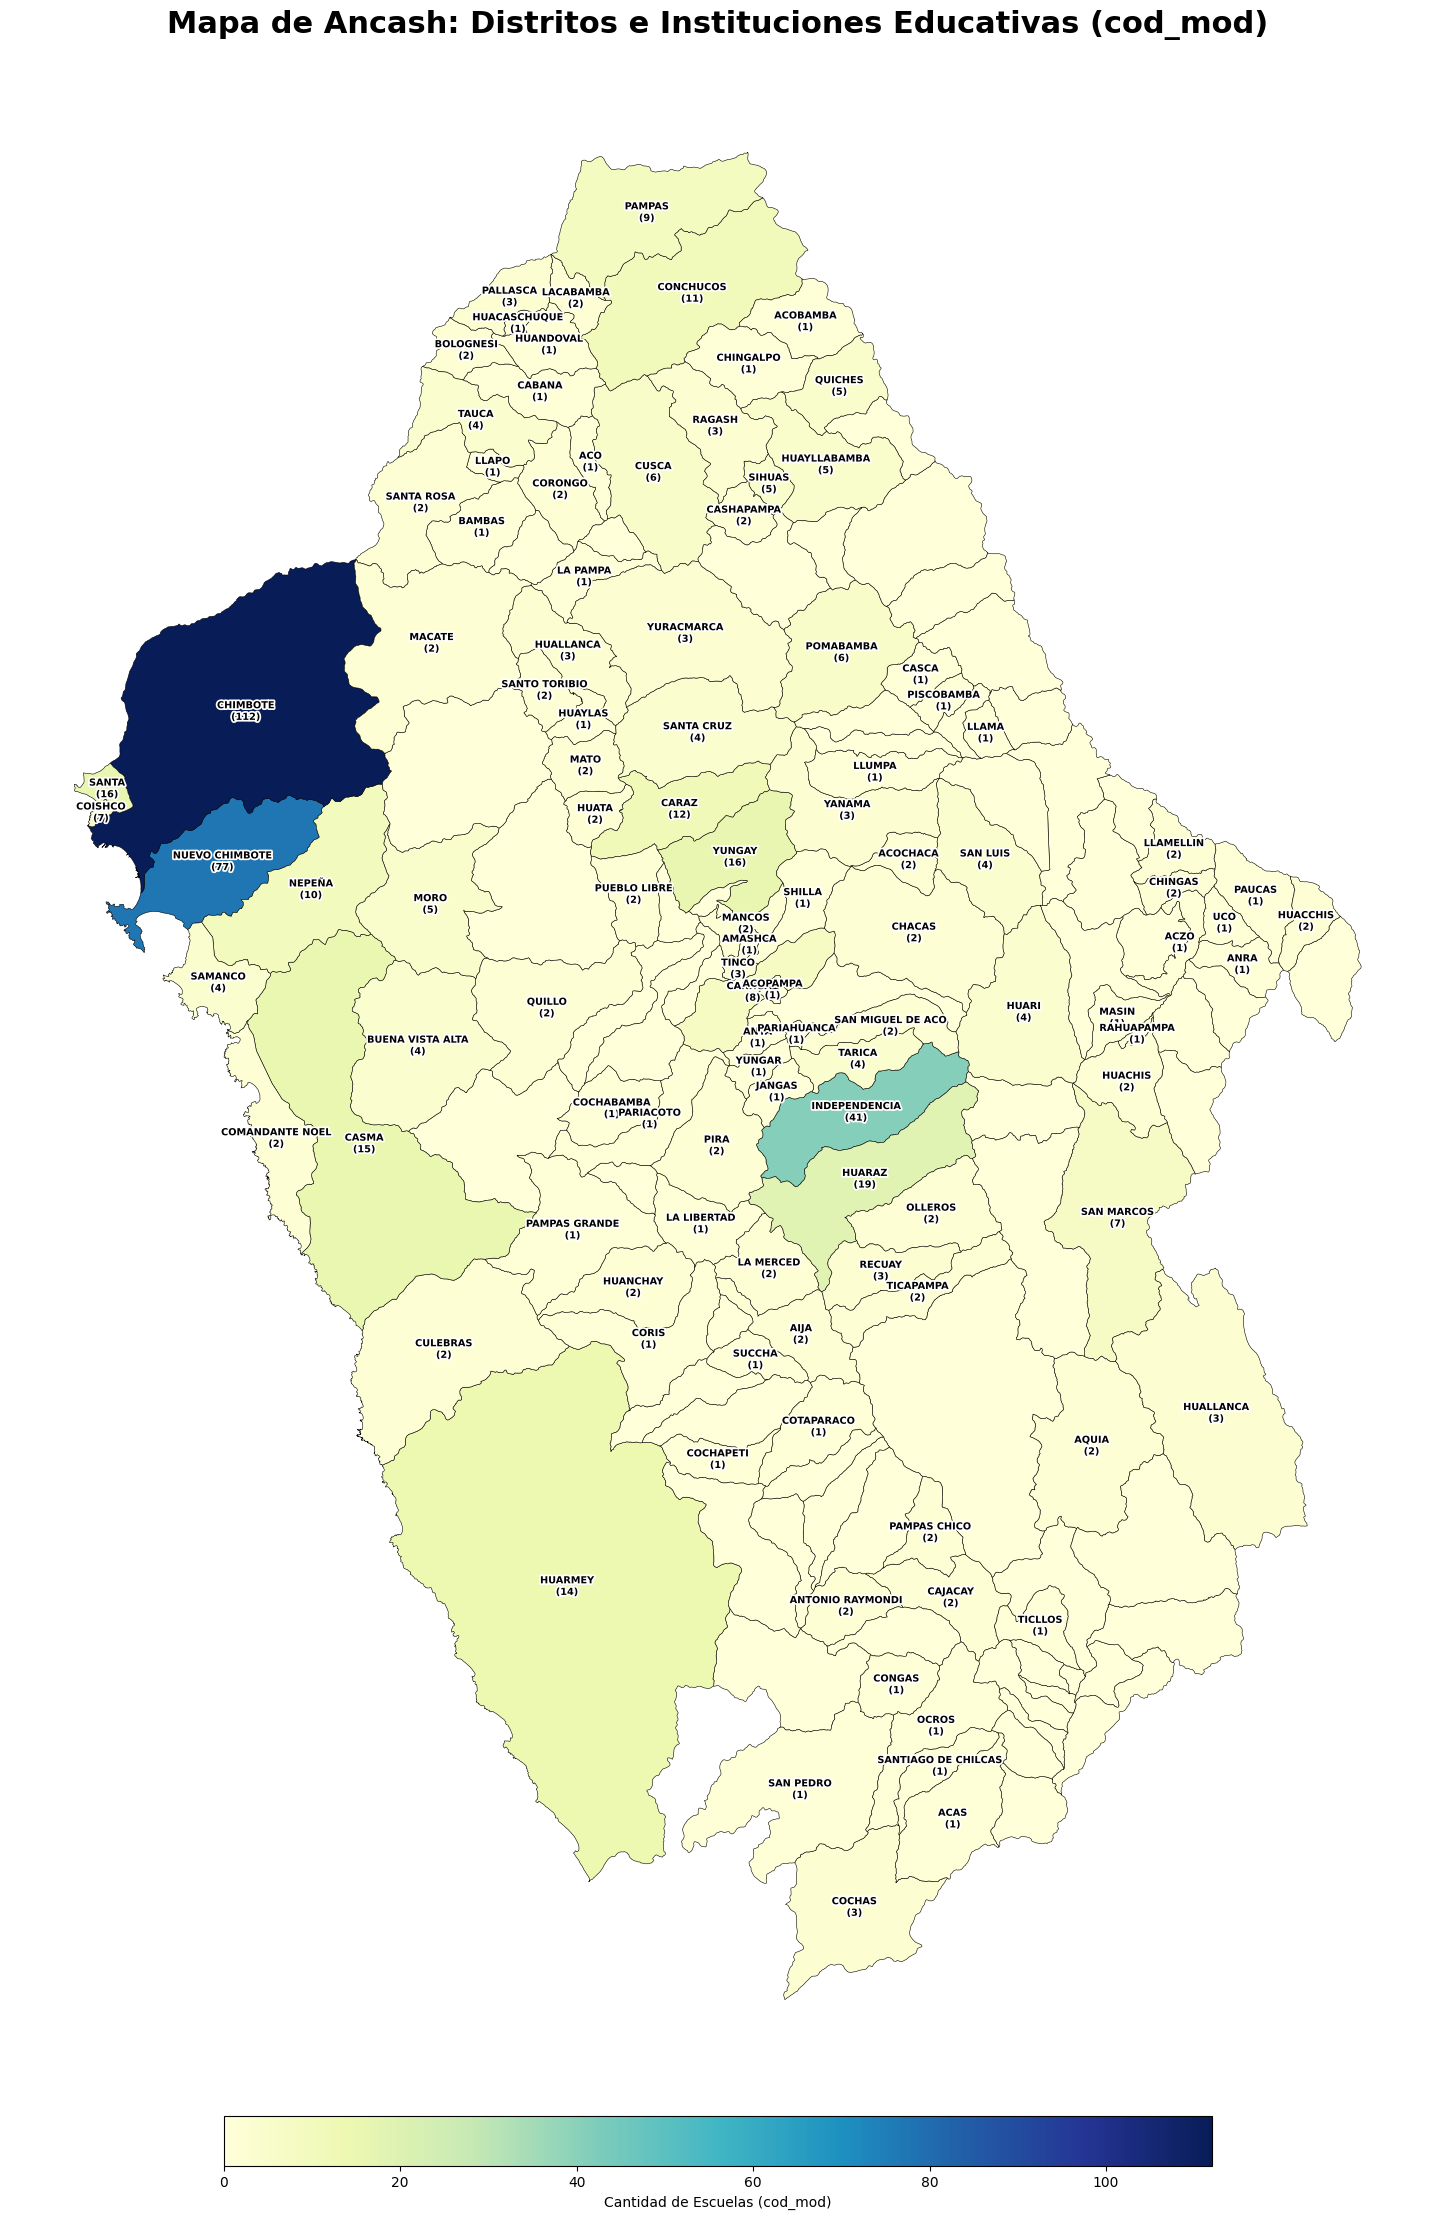

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects

# 1. Cargar el mapa de distritos
ancash_mapa = gpd.read_file("DISTRITOS_LIMITES/DISTRITOS.shp")
ancash_mapa = ancash_mapa[ancash_mapa['DEPARTAMEN'] == 'ANCASH'].copy()

# 2. Cargar los datos de educación
df_edu = pd.read_excel("emla2024.xlsx")

# 3. Agrupar por Distrito y contar 'cod_mod' únicos
escuelas_por_distrito = df_edu.groupby('Distrito')['cod_mod'].nunique().reset_index()
escuelas_por_distrito.columns = ['Distrito_Excel', 'Cant_Escuelas']

# 4. Unir el mapa con los datos (Normalizando nombres)
ancash_mapa['DISTRITO_NORM'] = ancash_mapa['DISTRITO'].str.strip().str.upper()
escuelas_por_distrito['Distrito_Excel'] = escuelas_por_distrito['Distrito_Excel'].str.strip().str.upper()

mapa_final = ancash_mapa.merge(
    escuelas_por_distrito, 
    left_on='DISTRITO_NORM', 
    right_on='Distrito_Excel', 
    how='left'
)

mapa_final['Cant_Escuelas'] = mapa_final['Cant_Escuelas'].fillna(0).astype(int)

# 5. Configurar la visualización
fig, ax = plt.subplots(figsize=(25, 25)) # Tamaño grande para que quepan los textos

mapa_final.plot(
    column='Cant_Escuelas',
    cmap='YlGnBu',
    legend=True,
    edgecolor='black',
    linewidth=0.4,
    legend_kwds={'label': "Cantidad de Escuelas (cod_mod)", 'orientation': "horizontal", 'shrink': 0.4, 'pad': 0.01},
    ax=ax
)

# 6. Imprimir NOMBRE y NÚMERO dentro de cada distrito
for idx, row in mapa_final.iterrows():
    if row['Cant_Escuelas'] > 0:
        centroid = row.geometry.centroid
        
        # Formatear el texto: NOMBRE\n(CANTIDAD)
        texto_etiqueta = f"{row['DISTRITO']}\n({row['Cant_Escuelas']})"
        
        txt = ax.text(
            centroid.x, centroid.y, 
            texto_etiqueta,
            fontsize=7,            # Ajusta el tamaño según necesites
            fontweight='bold',
            color='black',
            ha='center',
            va='center',
            linespacing=1.2        # Espaciado entre el nombre y el número
        )
        
        # Efecto de halo blanco para legibilidad sobre cualquier color
        txt.set_path_effects([patheffects.withStroke(linewidth=2.5, foreground='white')])

plt.title("Mapa de Ancash: Distritos e Instituciones Educativas (cod_mod)", fontsize=22, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()

# Guardar resultado en alta calidad
plt.savefig("mapa_detallado_ancash.png", dpi=300, bbox_inches='tight')
plt.show()

In [4]:
# Esto te mostrará la lista de nombres de columnas disponibles
print(ancash.columns)

# También puedes ver las primeras filas para estar seguro
print(ancash.head())

Index(['OBJECTID_1', 'UBIGEO', 'CODDEP', 'DEPARTAMEN', 'CODPROV', 'PROVINCIA',
       'CODDIST', 'DISTRITO', 'CAPITAL', 'FUENTE', 'geometry'],
      dtype='object')
      OBJECTID_1  UBIGEO CODDEP DEPARTAMEN CODPROV         PROVINCIA CODDIST  \
1315        1316  020301     02     ANCASH      03  ANTONIO RAYMONDI      01   
1316        1317  021206     02     ANCASH      12           HUAYLAS      06   
1317        1318  020502     02     ANCASH      05         BOLOGNESI      02   
1318        1319  020503     02     ANCASH      05         BOLOGNESI      03   
1319        1320  020505     02     ANCASH      05         BOLOGNESI      05   

                     DISTRITO     CAPITAL FUENTE  \
1315                LLAMELLIN   LLAMELLIN   INEI   
1316               PAMPAROMAS  PAMPAROMAS   INEI   
1317  ABELARDO PARDO LEZAMETA     LLACLLA   INEI   
1318         ANTONIO RAYMONDI      RAQUIA   INEI   
1319                  CAJACAY     CAJACAY   INEI   

                                         